# Comprehensive Analysis of Mastodon Mentions

This notebook aims to analyze the trend of Mastodon mentions in tweets over time, perform a detailed text analysis on tweets related to Mastodon, and explore user demographics engaging in these discussions. Additionally, we conduct a comparative sentiment analysis between Mastodon and Elon Musk mentions to understand the interconnected perceptions within the dataset. Through this multifaceted approach, we seek to uncover insights into the discourse around Mastodon and its relationship with influential figures like Elon Musk on the social media platform.

## Objectives

1. **Data Loading**: Load the `mastodon_tweets.csv` and `elon_tweets.csv` files to analyze tweets that mention Mastodon and Elon Musk, respectively.
2. **Data Preprocessing**: Prepare the datasets for analysis, ensuring the data is clean and structured appropriately for time series analysis, text analysis, and user demographics analysis.
3. **Time Series Analysis**:
    - Plot the number of Mastodon mentions over time to visualize trends, spikes, or patterns.
    - Analyze any periodicity or significant dates with noticeable changes in mention frequency.
4. **Text Analysis on Mastodon Tweets**:
    - Perform sentiment analysis to gauge the general sentiment around Mastodon in the tweets.
    - Conduct keyword extraction to identify the most frequently mentioned terms alongside Mastodon.
    - Analyze the context in which Mastodon is mentioned (e.g., comparisons to other platforms, specific events, or features of interest).
5. **User Demographics Analysis**:
    - Examine the demographics of Twitter users mentioning Mastodon, including verification status, location, and engagement metrics.
    - Analyze whether there is a correlation between a user's sentiment towards Elon Musk and their sentiment towards Mastodon.
6. **Comparative Sentiment Analysis**:
    - Compare the sentiment of tweets mentioning Mastodon with those mentioning Elon Musk, focusing on users who discuss both topics.
    - Explore the relationship between user sentiments towards these two subjects to infer interconnected perceptions.

**Author: Eric Uehling**  
*Date: 4.3.24*

## Data Loading

In this section, we load the `mastodon_tweets.csv` file into a pandas DataFrame. This file contains tweets that mention Mastodon, as identified by the previous script. We'll inspect the first few rows of the dataset to understand its structure.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/csv/mastodon_tweets.csv')
df.head()

,RePEc_id,author_id,id,text,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,referenced_id,referenced_type,lang
0,par290,2383986877,1593496829508853761,"Pues en lo que se cae o no se cae, ando acá en...",2022-11-18 06:50:24+00:00,0,0,5,0,NaN,NaN,own,es
1,par559,2796346572,1636772240179212288,"@Egocrata hey teenagers, no spying on Mastodon!",2023-03-17 16:51:26+00:00,0,0,0,0,74.0,1.636771e+18,replied_to,en
2,pad159,2751594014,1599836322633756675,RT @FabioGhironi: I don’t know if many colleag...,2022-12-05 18:41:17+00:00,13,0,0,0,NaN,1.599552e+18,retweeted,en
3,par20,331716360,1614540948108607488,Usuarios activos de Mastodon https://t.co/ejEE...,2023-01-15 08:32:13+00:00,1,0,1,1,2749.0,1.614535e+18,quoted,es
4,par20,331716360,1593970555782307842,Trump's Mastodon -- Key facts about Truth Soci...,2022-11-19 14:12:49+00:00,0,0,0,0,NaN,NaN,own,en


## Time Series Analysis

We will now examine the trend of Mastodon mentions over time. This involves aggregating the tweets by their `created_at` dates and plotting the resulting time series to visualize how Mastodon mentions have evolved.

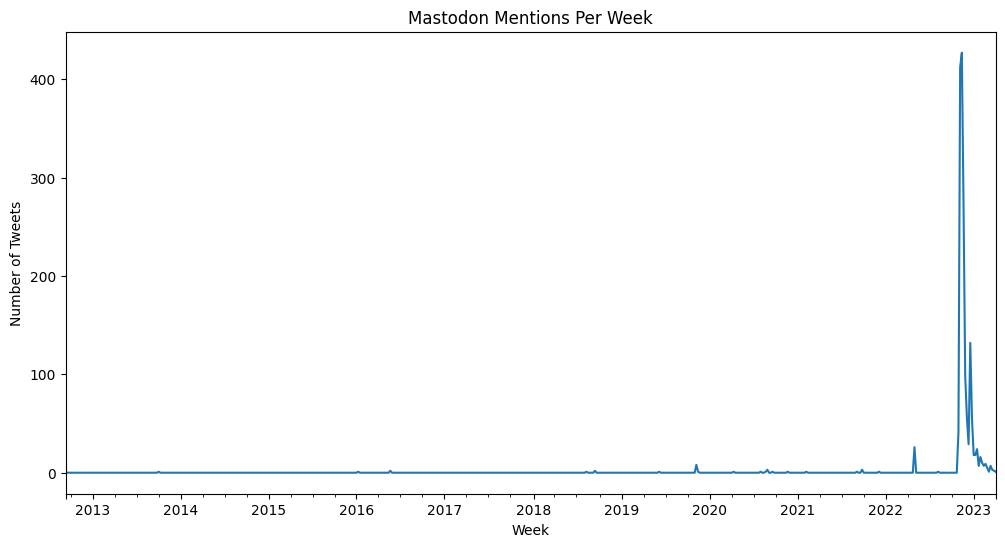

In [2]:
# Convert 'created_at' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Resampling to a weekly basis and counting tweets
tweets_by_date = df.resample('W', on='created_at').size()

# Plotting the time series of tweet counts
plt.figure(figsize=(12, 6))
tweets_by_date.plot(title='Mastodon Mentions Per Week')
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.show()

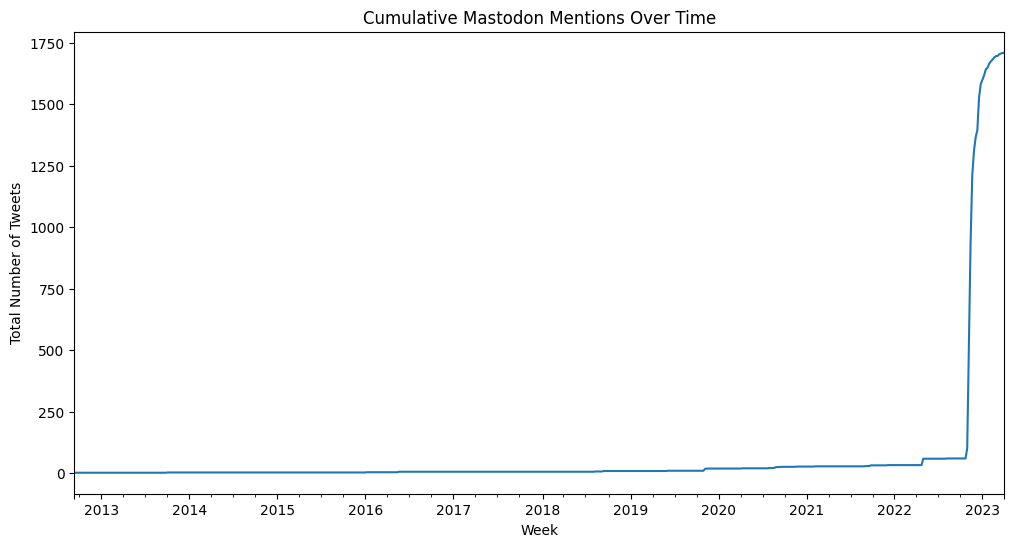

In [3]:
# Resampling to a weekly basis and counting tweets
tweets_by_week = df.resample('W', on='created_at').size()

# Calculating the cumulative sum of tweets to get the total amount over time
cumulative_tweets = tweets_by_week.cumsum()

# Plotting the time series of cumulative tweet counts
plt.figure(figsize=(12, 6))
cumulative_tweets.plot(title='Cumulative Mastodon Mentions Over Time')
plt.xlabel('Week')
plt.ylabel('Total Number of Tweets')
plt.show()

## Text Analysis with VADER

To delve into the discourse surrounding Mastodon mentions in tweets, we employ the VADER (Valence Aware Dictionary and sEntiment Reasoner) library. VADER is particularly adept at understanding the nuances of social media language, including slang, emojis, and abbreviations, making it ideal for our sentiment analysis. This section will analyze the overall sentiment of the Mastodon-related tweets and classify them as positive, neutral, or negative.


In [4]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
sia = SentimentIntensityAnalyzer()

# Applying VADER to each tweet
df['sentiments'] = df['text'].apply(lambda x: sia.polarity_scores(x))

# Extracting the compound score to summarize the sentiment into a single measure
df['compound'] = df['sentiments'].apply(lambda x: x['compound'])

# Classifying the overall sentiment based on the compound score
df['sentiment_type'] = df['compound'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

# Displaying the first few rows to verify our sentiment analysis
df[['text', 'compound', 'sentiment_type']].head()

,text,compound,sentiment_type
0,"Pues en lo que se cae o no se cae, ando acá en...",-0.2960,negative
1,"@Egocrata hey teenagers, no spying on Mastodon!",-0.3595,negative
2,RT @FabioGhironi: I don’t know if many colleag...,-0.0772,negative
3,Usuarios activos de Mastodon https://t.co/ejEE...,0.0000,neutral
4,Trump's Mastodon -- Key facts about Truth Soci...,0.3182,positive


### Visualizing Sentiment Distribution

After classifying the sentiments of Mastodon-related tweets, it's insightful to visualize the distribution of these sentiments. This helps us understand the general perception of Mastodon among Twitter users.

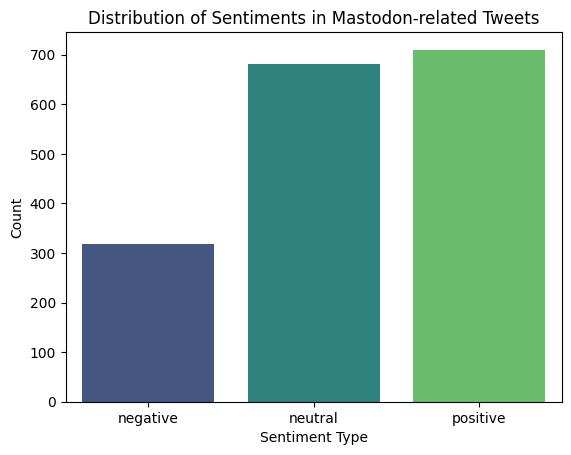

In [6]:
# Plotting the distribution of sentiment types
sns.countplot(x='sentiment_type', hue='sentiment_type', data=df, palette='viridis', legend=False)
plt.title('Distribution of Sentiments in Mastodon-related Tweets')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

### Visualizing Compound Scores

To gain a more nuanced understanding of the sentiments expressed in Mastodon-related tweets, we will visualize the distribution of VADER compound scores. These scores encapsulate the overall sentiment of each tweet, ranging from -1 (highly negative) to +1 (highly positive). This visualization helps us assess not just the balance between positive and negative sentiments, but also the intensity of those sentiments.

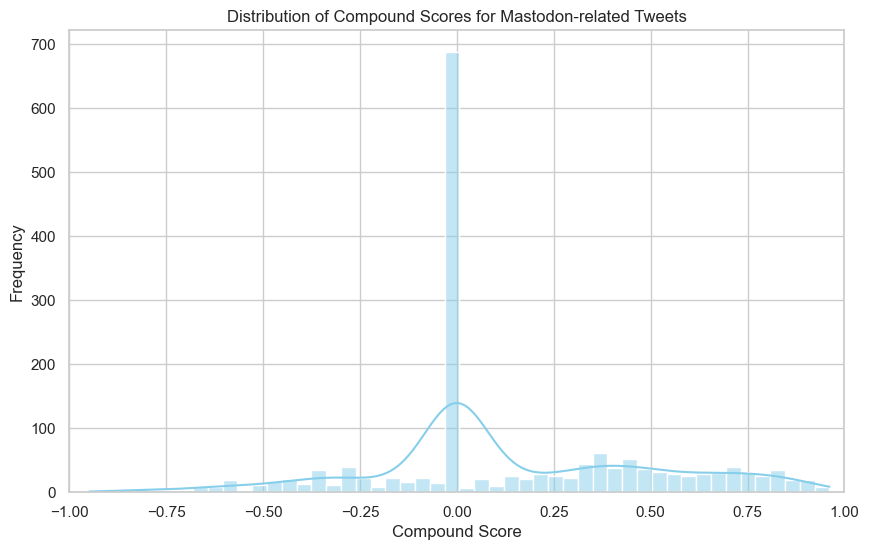

In [7]:
# Setting the style for better readability
sns.set(style="whitegrid")

# Plotting the distribution of compound scores
plt.figure(figsize=(10, 6))
sns.histplot(df['compound'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Compound Scores for Mastodon-related Tweets')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.xlim(-1, 1)  # Compound scores range from -1 to 1
plt.show()

## User Demographics Analysis of Mastodon Tweets

Understanding the demographics of users who mention Mastodon on Twitter provides valuable insights into the conversation's breadth and depth. This section examines various demographic aspects, including verification status, location, and engagement metrics like followers count, to sketch the profile of individuals driving the Mastodon discourse.

In [8]:
# Load user info data
user_info_df = pd.read_csv('../data/csv/cleaned_RePEc_userinfo.csv')

# Merge with Mastodon tweets data on user id
merged_df = pd.merge(df, user_info_df, left_on='author_id', right_on='id', how='inner')

# Display the merged DataFrame structure
merged_df.head()

,RePEc_id_x,author_id,id_x,text,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,...,id_y,location,name,username,verified,followers_count,following_count,tweet_count,listed_count,RePEc_id_y
0,par290,2383986877,1593496829508853761,"Pues en lo que se cae o no se cae, ando acá en...",2022-11-18 06:50:24+00:00,0,0,5,0,NaN,...,2383986877,Ciudad de México,Eva O. Arceo-Gomez,evaoarceo,False,6247,2268,15168,75,par290
1,NaN,2383986877,1593496829508853761,"Pues en lo que se cae o no se cae, ando acá en...",2022-11-18 06:50:24+00:00,0,0,5,0,NaN,...,2383986877,Ciudad de México,Eva O. Arceo-Gomez,evaoarceo,False,6247,2268,15168,75,par290
2,par559,2796346572,1636772240179212288,"@Egocrata hey teenagers, no spying on Mastodon!",2023-03-17 16:51:26+00:00,0,0,0,0,74.0,...,2796346572,"Rome, Italy",Jaime Arellano-Bover,j_arellanobover,False,2534,894,1031,17,par559
3,NaN,2796346572,1636772240179212288,"@Egocrata hey teenagers, no spying on Mastodon!",2023-03-17 16:51:26+00:00,0,0,0,0,76.0,...,2796346572,"Rome, Italy",Jaime Arellano-Bover,j_arellanobover,False,2534,894,1031,17,par559
4,pad159,2751594014,1599836322633756675,RT @FabioGhironi: I don’t know if many colleag...,2022-12-05 18:41:17+00:00,13,0,0,0,NaN,...,2751594014,Copenhagen & Helsinki,Tony Addison,tonysangle,False,21382,2762,51077,619,pad159


### Verified Status

First, we explore the verification status of users mentioning Mastodon. Verified users on Twitter are typically public figures, organizations, or entities recognized for their influence or importance, which could significantly impact the spread and perception of information related to Mastodon.

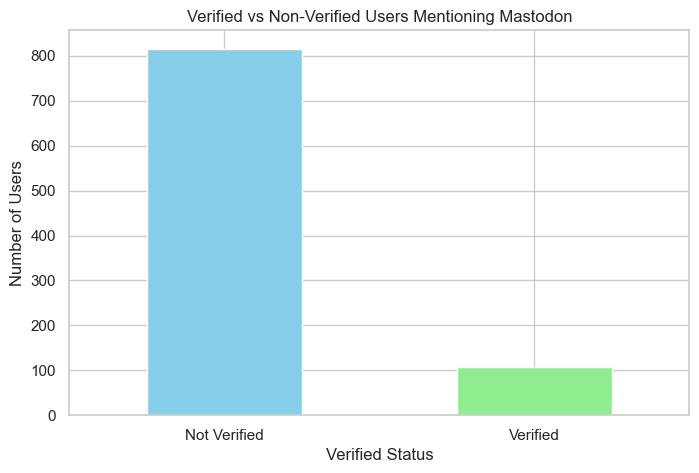

In [9]:
# Count verified vs. non-verified users
verified_counts = merged_df['verified'].value_counts()

# Visualization
plt.figure(figsize=(8, 5))
verified_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Verified vs Non-Verified Users Mentioning Mastodon')
plt.xlabel('Verified Status')
plt.ylabel('Number of Users')
plt.xticks(ticks=[0, 1], labels=['Not Verified', 'Verified'], rotation=0)
plt.show()

### User Location

Next, we examine the geographical distribution of users. The location data, while not always precisely filled out by users, can offer insights into the global interest and regional differences in the discussion about Mastodon.

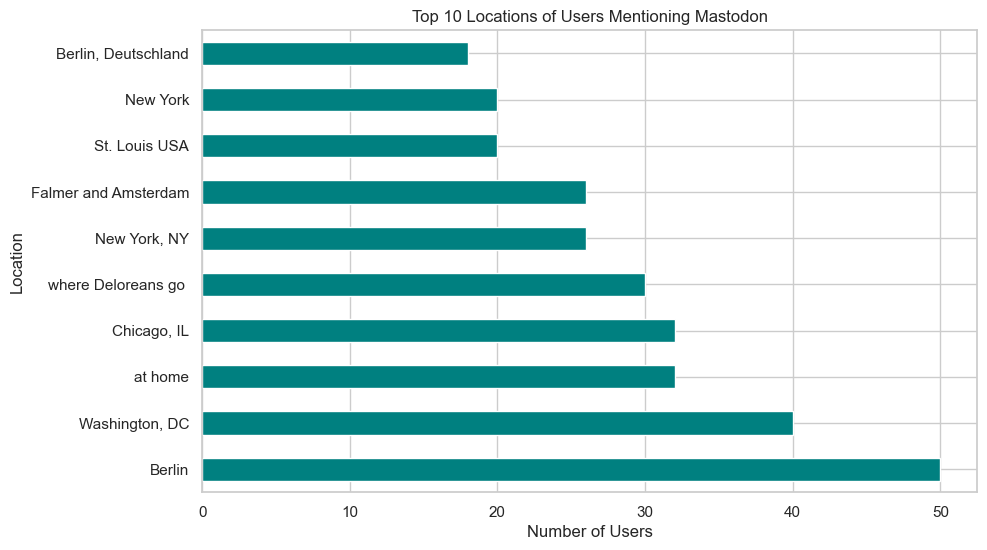

In [10]:
# Filtering out users without a specified location
location_counts = merged_df[merged_df['location'].notnull()]['location'].value_counts().head(10)

# Visualization
plt.figure(figsize=(10, 6))
location_counts.plot(kind='barh', color='teal')
plt.title('Top 10 Locations of Users Mentioning Mastodon')
plt.xlabel('Number of Users')
plt.ylabel('Location')
plt.show()

### Followers Count

Analyzing the followers count of users mentioning Mastodon can help us understand their potential reach and influence. Users with a high number of followers might significantly impact spreading information about Mastodon.

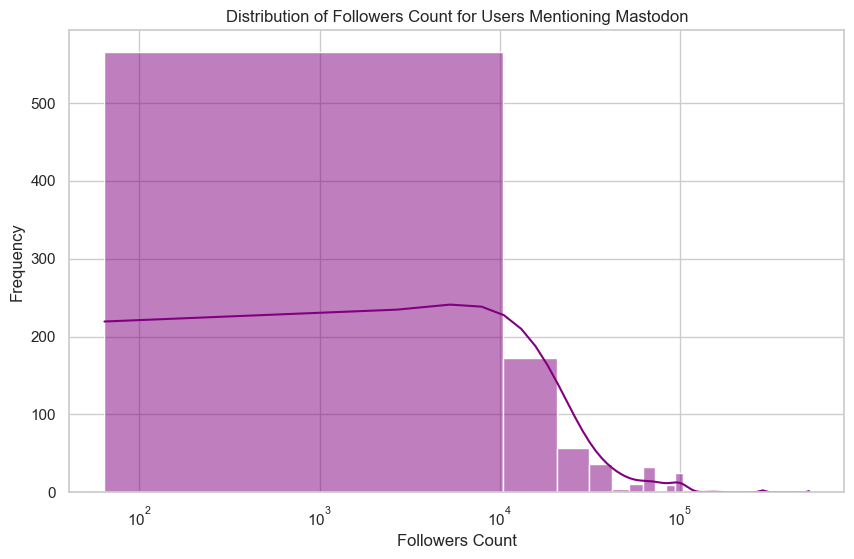

In [11]:
# Visualization of Followers Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['followers_count'], bins=50, color='purple', kde=True)
plt.title('Distribution of Followers Count for Users Mentioning Mastodon')
plt.xlabel('Followers Count')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale due to wide distribution
plt.show()

### Following Count

The number of accounts a user follows can also be an interesting metric, providing insight into the user's level of engagement and interest in various topics, including Mastodon.

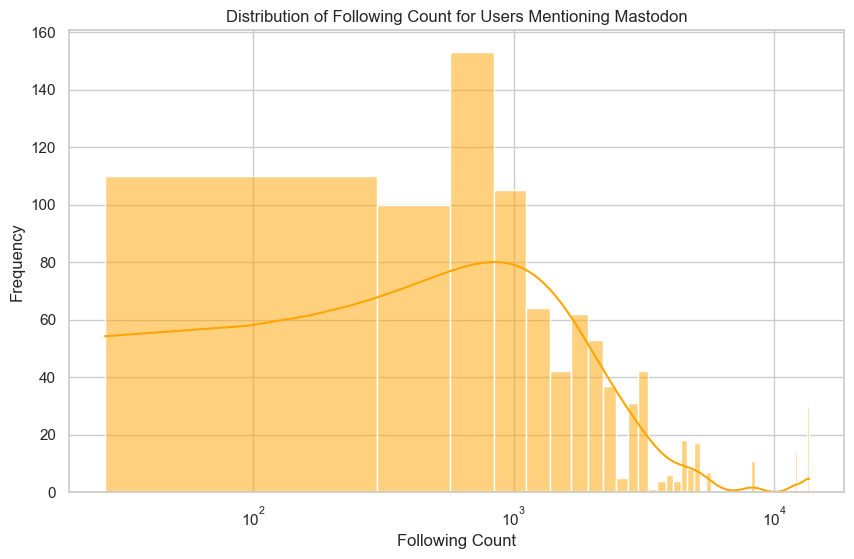

In [12]:
# Visualization of Following Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['following_count'], bins=50, color='orange', kde=True)
plt.title('Distribution of Following Count for Users Mentioning Mastodon')
plt.xlabel('Following Count')
plt.ylabel('Frequency')
plt.xscale('log')  # Using log scale for better readability
plt.show()

### Tweet Count

The total number of tweets a user has made can indicate their level of activity and engagement on Twitter. Users who tweet frequently are likely more engaged in various discussions, including topics related to Mastodon.

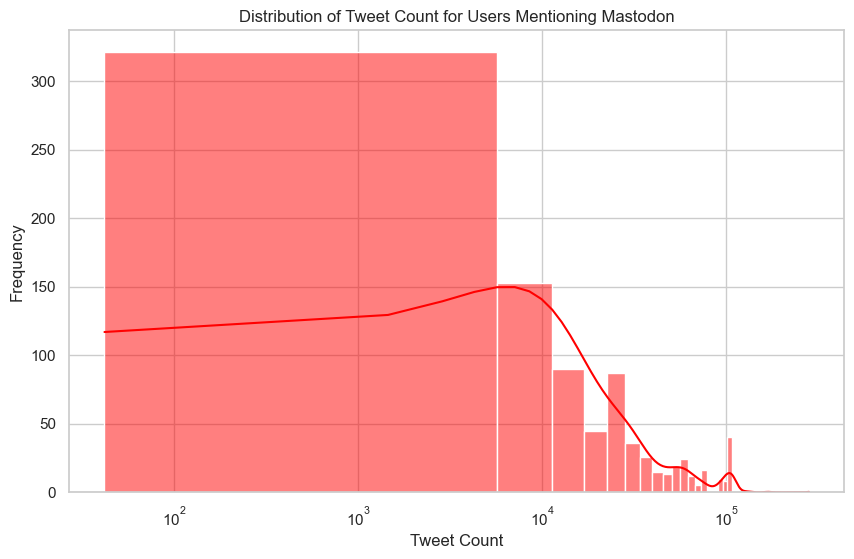

In [13]:
# Visualization of Tweet Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['tweet_count'], bins=50, color='red', kde=True)
plt.title('Distribution of Tweet Count for Users Mentioning Mastodon')
plt.xlabel('Tweet Count')
plt.ylabel('Frequency')
plt.xscale('log')  # Applying log scale
plt.show()

### Listed Count

Finally, we analyze the listed count, which reflects how many times a user has been added to public lists. A high listed count could indicate recognition or influence within specific communities or topics.

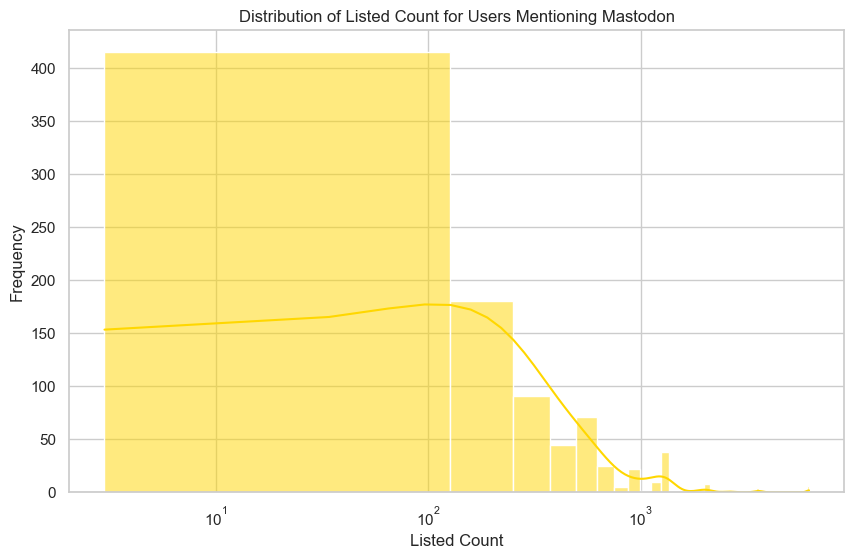

In [14]:
# Visualization of Listed Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['listed_count'], bins=50, color='gold', kde=True)
plt.title('Distribution of Listed Count for Users Mentioning Mastodon')
plt.xlabel('Listed Count')
plt.ylabel('Frequency')
plt.xscale('log')  # Log scale due to skewness
plt.show()

## Cross-Analysis of Sentiment: Mastodon vs. Elon Musk

In this section, we delve into a comparative sentiment analysis between tweets mentioning Mastodon and those mentioning Elon Musk. By cross-referencing user engagement metrics and sentiment scores, we aim to uncover insights into how discussions about these topics differ or align, potentially revealing the user base's perception of each.

In [15]:
elon_df = pd.read_csv('../data/csv/elon_tweets.csv')

# Apply VADER to Elon Musk tweets to get compound sentiment scores
elon_df['compound'] = elon_df['text'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Merge Elon Musk DataFrame with User Info
# Ensure the data types of 'author_id' in elon_df and 'id' in user_info_df match
elon_merged_df = pd.merge(elon_df, user_info_df, left_on='author_id', right_on='id', how='left')

# Display the merged DataFrame to check the merge was successful
elon_merged_df.head()

,RePEc_id_x,author_id,id_x,text,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,...,id_y,location,name,username,verified,followers_count,following_count,tweet_count,listed_count,RePEc_id_y
0,pal276,766166816922173440,1538069324296237056,"Assalamualaikum &amp; Good day, It is my pleas...",2022-06-18 08:01:17+00:00,1,1,2,0,NaN,...,7.661668e+17,"Sintok, Malaysia",Md Mahmudul Alam,m_mahmudul_alam,False,494.0,329.0,89.0,1.0,pal276
1,pab28,345981686,1638243949331509254,RT @elonmusk: https://t.co/nhnFAAO9iO,2023-03-21 18:19:29+00:00,17899,0,0,0,0.0,...,3.459817e+08,Paris,Sofiane Aboura,sofianeaboura,False,593.0,549.0,3143.0,19.0,pab28
2,pab28,345981686,1638243481687662592,RT @elonmusk: https://t.co/6LaLFNxZ9T,2023-03-21 18:17:37+00:00,26201,0,0,0,0.0,...,3.459817e+08,Paris,Sofiane Aboura,sofianeaboura,False,593.0,549.0,3143.0,19.0,pab28
3,pab28,345981686,1634620114682142720,RT @elonmusk: https://t.co/tTMWOHcUom,2023-03-11 18:19:39+00:00,52698,0,0,0,0.0,...,3.459817e+08,Paris,Sofiane Aboura,sofianeaboura,False,593.0,549.0,3143.0,19.0,pab28
4,pab28,345981686,1518687816603123717,RT @ReutersBiz: Twitter agreed to sell to Tesl...,2022-04-25 20:26:05+00:00,29,0,0,0,NaN,...,3.459817e+08,Paris,Sofiane Aboura,sofianeaboura,False,593.0,549.0,3143.0,19.0,pab28


### Sentiment Distribution Comparison

To start, we compare the distribution of sentiment scores (compound scores from VADER) for tweets mentioning Mastodon and Elon Musk, respectively. This comparison will help us gauge the overall sentiment polarity (positive, neutral, negative) towards each topic.

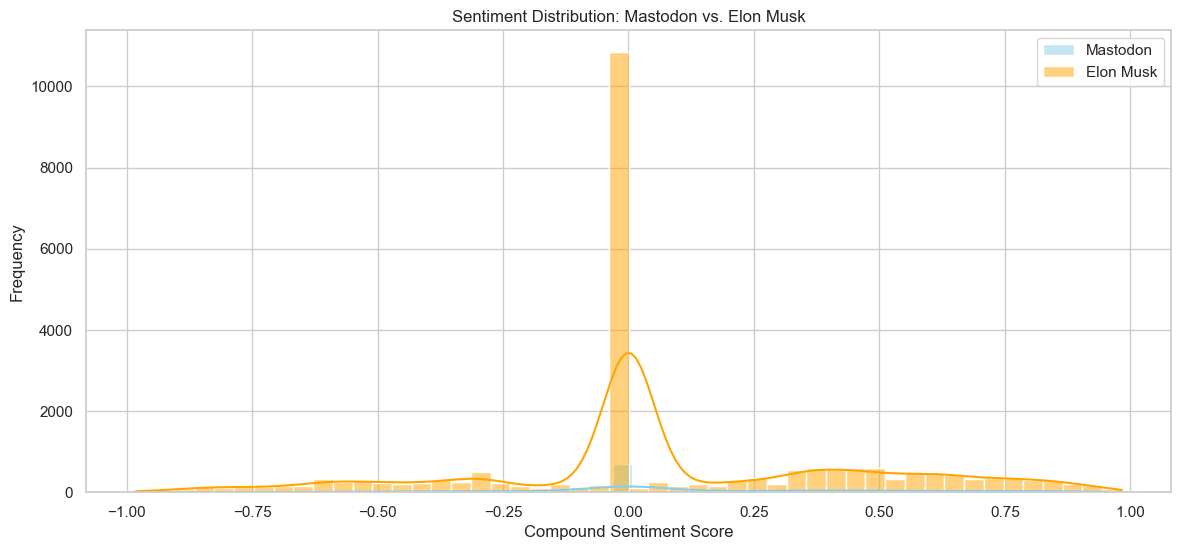

In [16]:
# Plotting the sentiment distribution comparison
plt.figure(figsize=(14, 6))

# Mastodon
sns.histplot(df['compound'], bins=50, color='skyblue', label='Mastodon', kde=True)

# Elon Musk
sns.histplot(elon_df['compound'], bins=50, color='orange', label='Elon Musk', kde=True)

plt.title('Sentiment Distribution: Mastodon vs. Elon Musk')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Average Sentiment Score Comparison

Beyond distribution, examining the average sentiment score for each topic can provide a straightforward comparison of overall sentiment. This metric allows us to see which topic tends to generate more positive or negative sentiment on average.

Average Sentiment Score for Mastodon: 0.13966461988304094
Average Sentiment Score for Elon Musk: 0.08875619904177523


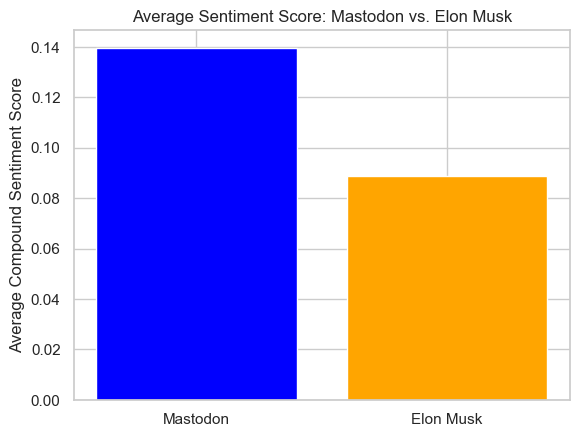

In [17]:
# Calculate average compound scores for both Mastodon and Elon Musk mentions
average_sentiment_mastodon = df['compound'].mean()
average_sentiment_elon = elon_df['compound'].mean()

# Displaying the average sentiment scores
print(f"Average Sentiment Score for Mastodon: {average_sentiment_mastodon}")
print(f"Average Sentiment Score for Elon Musk: {average_sentiment_elon}")

# Visualization
plt.bar(['Mastodon', 'Elon Musk'], [average_sentiment_mastodon, average_sentiment_elon], color=['blue', 'orange'])
plt.title('Average Sentiment Score: Mastodon vs. Elon Musk')
plt.ylabel('Average Compound Sentiment Score')
plt.show()

## Analyzing the Relationship Between User Sentiments for Elon Musk and Mastodon

To understand the interplay between sentiments towards Elon Musk and Mastodon among Twitter users, we'll conduct an analysis focusing on users who have mentioned both topics. This will allow us to explore whether there's a correlation between a user's sentiment towards Elon Musk and their sentiment towards Mastodon, providing insights into the potentially interconnected perception of these subjects.

In [18]:
# Identify users who have mentioned both topics
users_mentioned_both = set(merged_df['author_id']) & set(elon_merged_df['author_id'])

# Filter DataFrames to include only those users
mastodon_both_df = merged_df[merged_df['author_id'].isin(users_mentioned_both)]
elon_both_df = elon_merged_df[elon_merged_df['author_id'].isin(users_mentioned_both)]

# Calculate average sentiment per user for Mastodon
avg_sentiment_mastodon = mastodon_both_df.groupby('author_id')['compound'].mean().reset_index(name='avg_sentiment_mastodon')

# Calculate average sentiment per user for Elon Musk
avg_sentiment_elon = elon_both_df.groupby('author_id')['compound'].mean().reset_index(name='avg_sentiment_elon')

# Merge the average sentiment scores on author_id
user_sentiment_comparison = pd.merge(avg_sentiment_mastodon, avg_sentiment_elon, on='author_id')

### Correlation Analysis

To quantitatively assess the relationship between sentiments, we will calculate the correlation coefficient between the average sentiment scores for Elon Musk and Mastodon. This coefficient will help us understand the direction and strength of the relationship.

In [19]:
# Calculate the correlation between average sentiment scores
correlation = user_sentiment_comparison['avg_sentiment_mastodon'].corr(user_sentiment_comparison['avg_sentiment_elon'])
print(f"Correlation between user sentiments for Mastodon and Elon Musk: {correlation}")

Correlation between user sentiments for Mastodon and Elon Musk: 0.12819325521261904


### Visualization of Sentiment Relationship

Visualizing the relationship between the average sentiment scores for Mastodon and Elon Musk will provide further insights into how sentiments towards these two subjects interrelate among users who discuss both topics.

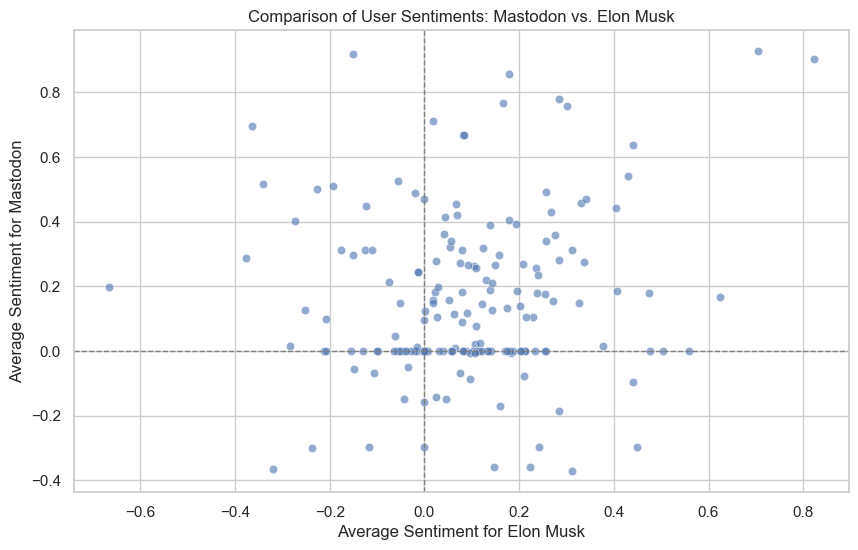

In [20]:
# Scatter plot of average sentiments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_sentiment_comparison, x='avg_sentiment_elon', y='avg_sentiment_mastodon', alpha=0.6)
plt.title('Comparison of User Sentiments: Mastodon vs. Elon Musk')
plt.xlabel('Average Sentiment for Elon Musk')
plt.ylabel('Average Sentiment for Mastodon')
plt.axhline(0, color='grey', lw=1, linestyle='--')
plt.axvline(0, color='grey', lw=1, linestyle='--')
plt.grid(True)
plt.show()